In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [3]:
df_train = pd.read_csv("C:\\Users\\Alek\\DATA\\Titanic_python\\train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


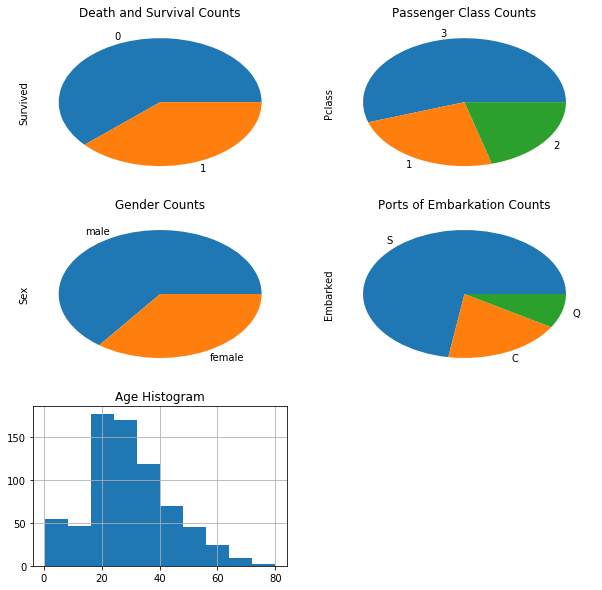

In [12]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='pie', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='pie', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='pie', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='pie', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

# PClass

In [13]:
pclass_xt = pd.crosstab(df_train["Pclass"], df_train["Survived"])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [14]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


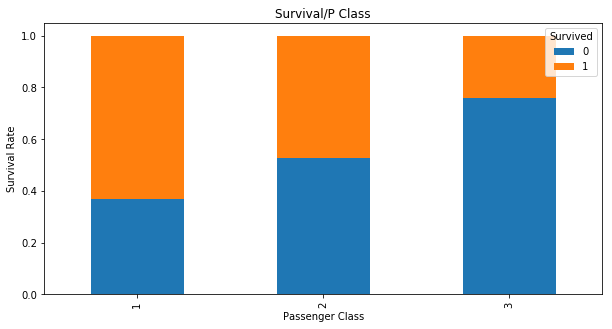

In [15]:
pclass_xt_pct.plot(kind='bar', stacked=True, title="Survival/P Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

# Male/Female

In [16]:
sexes=sorted(df_train['Sex'].unique())
gender_mapping=dict(zip(sexes, range(0, len(sexes)+1)))
gender_mapping

{'female': 0, 'male': 1}

In [17]:
df_train['Sex_Val'] = df_train['Sex'].map(gender_mapping)

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [19]:
sex_val_xt=pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt

Survived,0,1
Sex_Val,,
0,81,233
1,468,109


In [20]:
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1), axis=0)
sex_val_xt_pct

Survived,0,1
Sex_Val,,
0,0.257962,0.742038
1,0.811092,0.188908


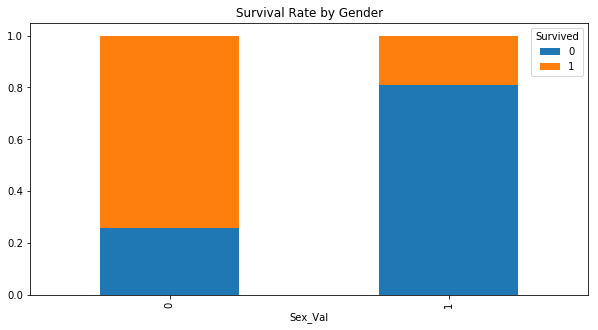

In [21]:
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

In [22]:
passenger_class = sorted(df_train["Pclass"].unique())
passenger_class

[1, 2, 3]

In [23]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('M: ',p_class, len(df_train[(df_train['Sex'] == 'male') & (df_train['Pclass'] == p_class)]))
    print('F: ',p_class, len(df_train[(df_train['Sex'] == 'female') & (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


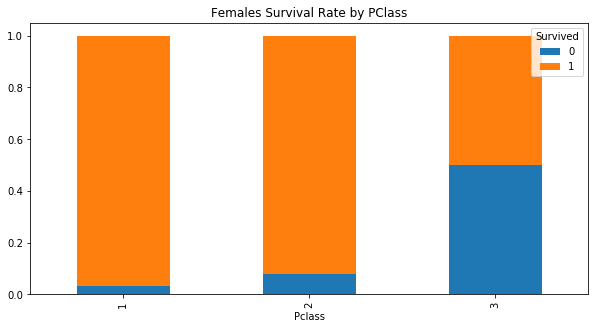

In [24]:
df_female = df_train[df_train['Sex_Val']==0]
females_xt = pd.crosstab(df_female['Pclass'], df_female['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1), axis=0)
females_xt_pct.plot(kind='bar', stacked=True, title='Females Survival Rate by PClass')

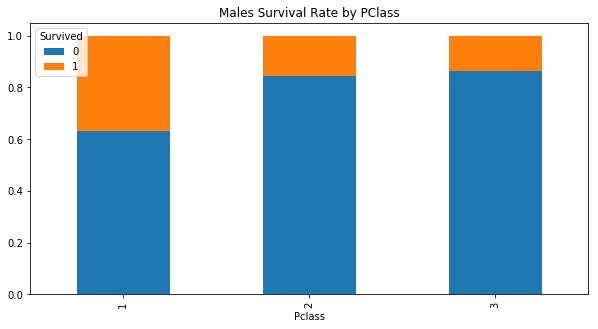

In [25]:
df_male = df_train[df_train['Sex_Val']==1]
females_xt = pd.crosstab(df_male['Pclass'], df_male['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1), axis=0)
females_xt_pct.plot(kind='bar', stacked=True, title='Males Survival Rate by PClass')

# Embarked

In [26]:
df_train['Embarked'].fillna(value="", inplace=True)

In [27]:
embarked_locs = sorted(df_train['Embarked'].unique())
embarked_locs

['', 'C', 'Q', 'S']

In [28]:
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs))))
embarked_locs_mapping

{'': 0, 'C': 1, 'Q': 2, 'S': 3}

In [29]:
df_train["Embarked_Val"] = df_train['Embarked'].map(embarked_locs_mapping).astype(int)

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3


In [31]:
if len(df_train[df_train['Embarked']==''])>0:
    df_train.replace({'Embarked_Val' :{embarked_locs_mapping[''] :
                                       embarked_locs_mapping['S']}}, inplace=True)

In [32]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[1, 2, 3]

In [33]:
embarked_val_qt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_qt

Survived,0,1
Embarked_Val,,
1,75,93
2,47,30
3,427,219


In [34]:
embarked_val_qt_pct = embarked_val_qt.div(embarked_val_qt.sum(1), axis=0)
embarked_val_qt_pct

Survived,0,1
Embarked_Val,,
1,0.446429,0.553571
2,0.610390,0.389610
3,0.660991,0.339009


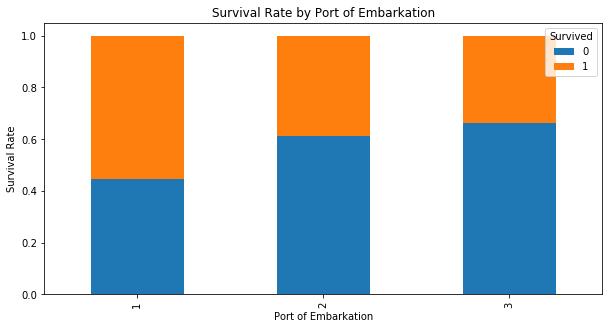

In [35]:
embarked_val_qt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

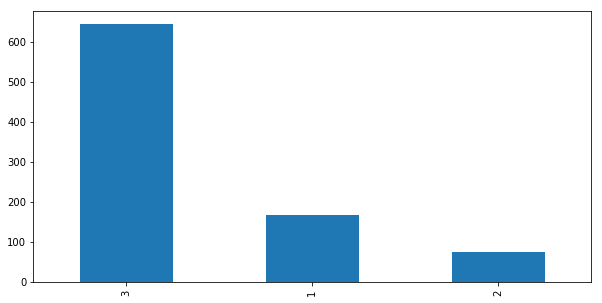

In [36]:
df_train['Embarked_Val'].value_counts().plot(kind='bar')

# Age

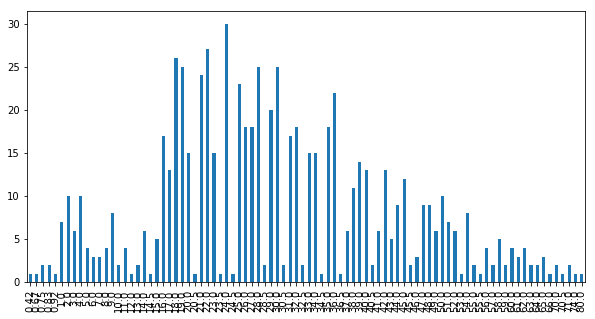

In [37]:
df_train['Age'].value_counts().sort_index().plot(kind='bar')

In [38]:
len(df_train[df_train['Age'].isnull()])

177

In [39]:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [40]:
len(df_train[df_train['AgeFill'].isnull()])

0

In [41]:
df_train[df_train['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,AgeFill
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,2,25.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,3,30.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1,21.5
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,1,25.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,2,21.5
